# Filter `wer201`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from empymod import fdesign, versions

### Style adjustments

In [3]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'serif'

## Create or load data

In [14]:
fI0 = fdesign.j0_1(5)
fI1 = fdesign.j1_1(5)
r = np.logspace(0, 10, 1000)

In [27]:
inp1 = {'r': r,
        'r_def': (1, 1, 2),
        'spacing': (0.01, 0.3, 50),
        'shift': (-8, 2, 50),
        'verb': 2,
        'plot': 0,
        'save': True,
        'full_output': True,
        'fI': (fI0, fI1)}

In [28]:
try:
    filt1, out1 = fdesign.load_filter('t51', True)
    filt2, out2 = fdesign.load_filter('t101', True)
    filt3, out3 = fdesign.load_filter('t201', True)
    filt4, out4 = fdesign.load_filter('t401', True)
except:
    filt1, out1 = fdesign.design(n=51, name='t51', **inp1)
    filt2, out2 = fdesign.design(n=101, name='t101', **inp1)
    filt3, out3 = fdesign.design(n=201, name='t201', **inp1)
    filt4, out4 = fdesign.design(n=401, name='t401', **inp1)

   brute fct calls : 2500                                   

   Filter length   : 51
   Best filter
   > Min field     : 3.24912e-07
   > Spacing       : 0.1697959184
   > Shift         : -0.04081632653
   > Base min/max  : 1.376379e-02 / 6.695908e+01

:: empymod END; runtime = 0:00:06.947719 :: 

   brute fct calls : 2500                                   

   Filter length   : 101
   Best filter
   > Min field     : 4.94011e-10
   > Spacing       : 0.1106122449
   > Shift         : -1.265306122
   > Base min/max  : 1.118330e-03 / 7.118671e+01

:: empymod END; runtime = 0:00:18.872244 :: 

   brute fct calls : 2500                                   

   Filter length   : 201
   Best filter
   > Min field     : 3.61103e-16
   > Spacing       : 0.06326530612
   > Shift         : -1.469387755
   > Base min/max  : 4.114108e-04 / 1.286561e+02

:: empymod END; runtime = 0:01:10.630807 :: 

   brute fct calls : 2500                                   

   Filter length   : 401
   Best filter

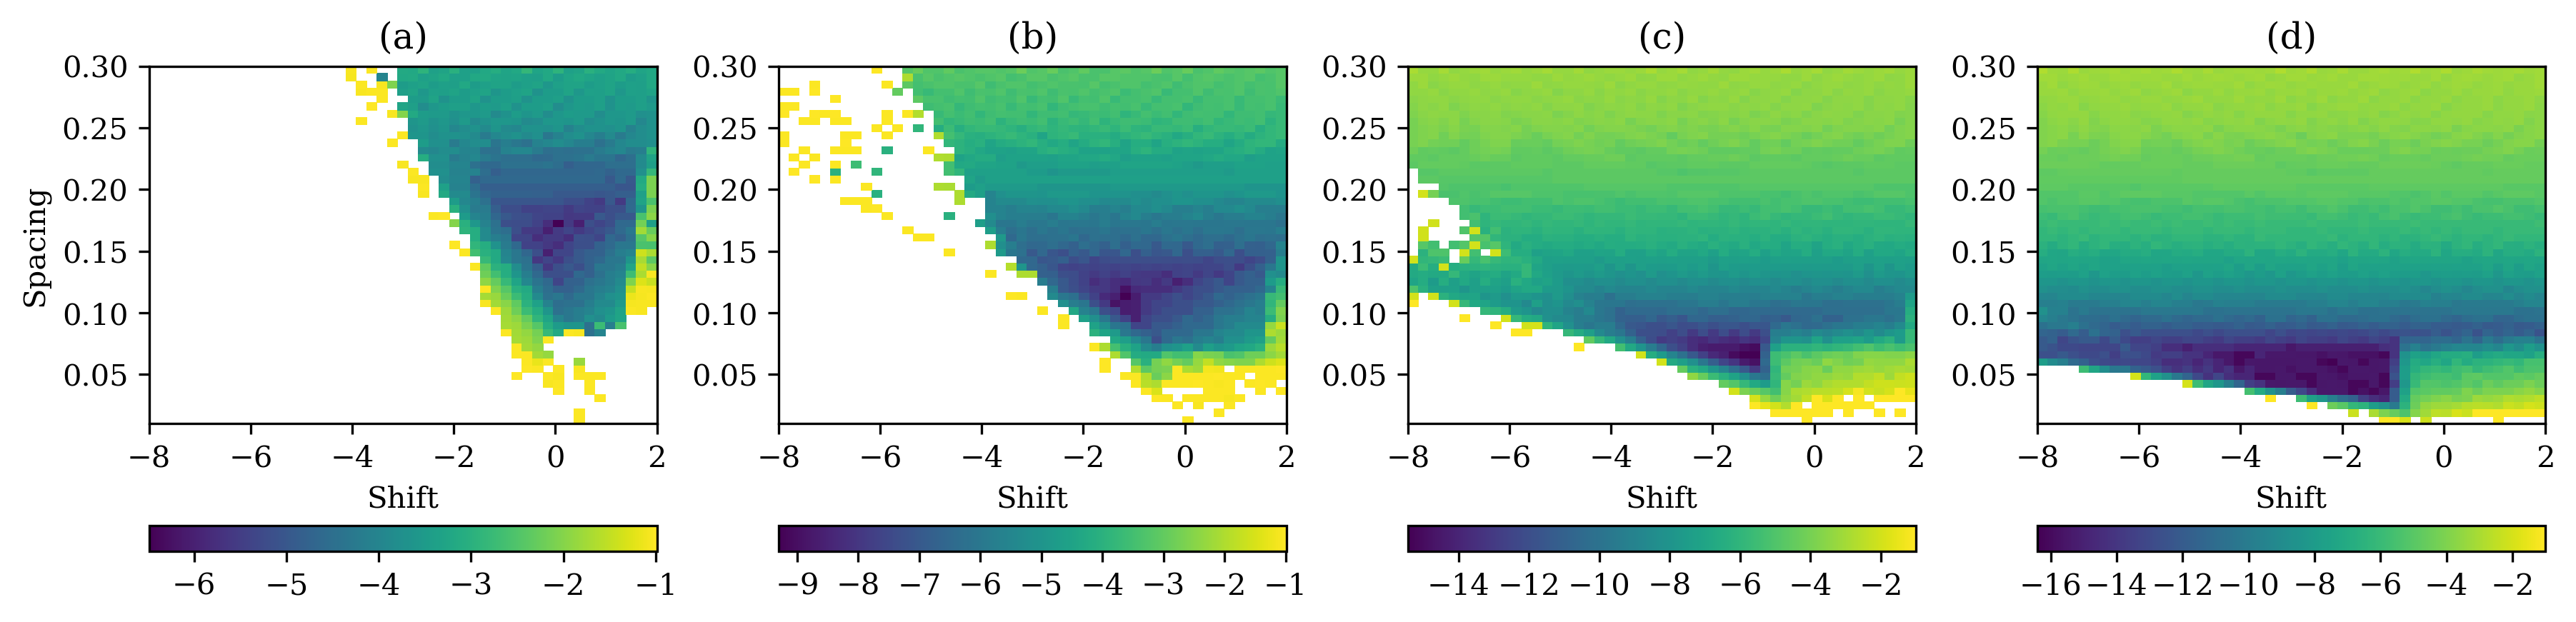

In [31]:
def plot_out(out):
    
    # Get spacing and shift values from full output of brute
    spacing = out[2][0, :, 0]
    shift = out[2][1, 0, :]

    # Get minimum field values from full output of brute
    minfield = np.squeeze(out[3])
    
    field = np.log10(minfield)
    cmap = plt.cm.viridis

    field = np.ma.masked_where(np.isinf(minfield), field)
    plt.pcolormesh(shift, spacing, field, cmap=cmap, linewidth=0, rasterized=True)
    
    plt.xlabel('Shift')
    inp = {'orientation': 'horizontal', 'pad': 0.2, 'fraction': 0.1}
    if np.max(minfield) < 1e-12:
        inp['ticks'] = -np.arange(6)-12
    plt.colorbar(**inp)
    
# Create figure
plt.figure(figsize=(12, 3))

# (a) Overview
plt.subplot(141)
plt.title('(a)')
plt.ylabel('Spacing')
plot_out(out1)

# (b) First zoom
plt.subplot(142)
plt.title('(b)')
plot_out(out2)

# (c) Detail
plt.subplot(143)
plt.title('(c)')
plot_out(out3)

# (d) Very detailed
plt.subplot(144)
plt.title('(d)')
plot_out(out4)

plt.tight_layout()

# Save and show plot
###plt.savefig('../figures/201.pdf', bbox_inches='tight')
plt.show()

In [32]:
inp2 = {'r': r,
        'r_def': (1, 1, 2),
        'n': 201,
        'verb': 2,
        'plot': 0,
        'save': True,
        'full_output': True,
        'fI': (fI0, fI1)}

In [33]:
try:
    filt1, out1 = fdesign.load_filter('201-1', True)
    filt2, out2 = fdesign.load_filter('201-2', True)
    filt3, out3 = fdesign.load_filter('201-3', True)
    filt4, out4 = fdesign.load_filter('201-4', True)
except:
    filt1, out1 = fdesign.design(spacing=(0.01, 0.2, 10), shift=(-4, 0, 10), name='201-1', **inp2)
    filt2, out2 = fdesign.design(spacing=(0.047, 0.08, 10), shift=(-2.4, -0.75, 10), name='201-2', **inp2)
    filt3, out3 = fdesign.design(spacing=(0.0575, 0.0675, 200), shift=(-1.5, -1.15, 200), name='201-3', **inp2)
    filt4, out4 = fdesign.design(spacing=(0.0605, 0.061, 100), shift=(-1.31, -1.29, 100), name='201-4', **inp2)
filt, out = fdesign.load_filter('wer201', True)

## Figure of solution space

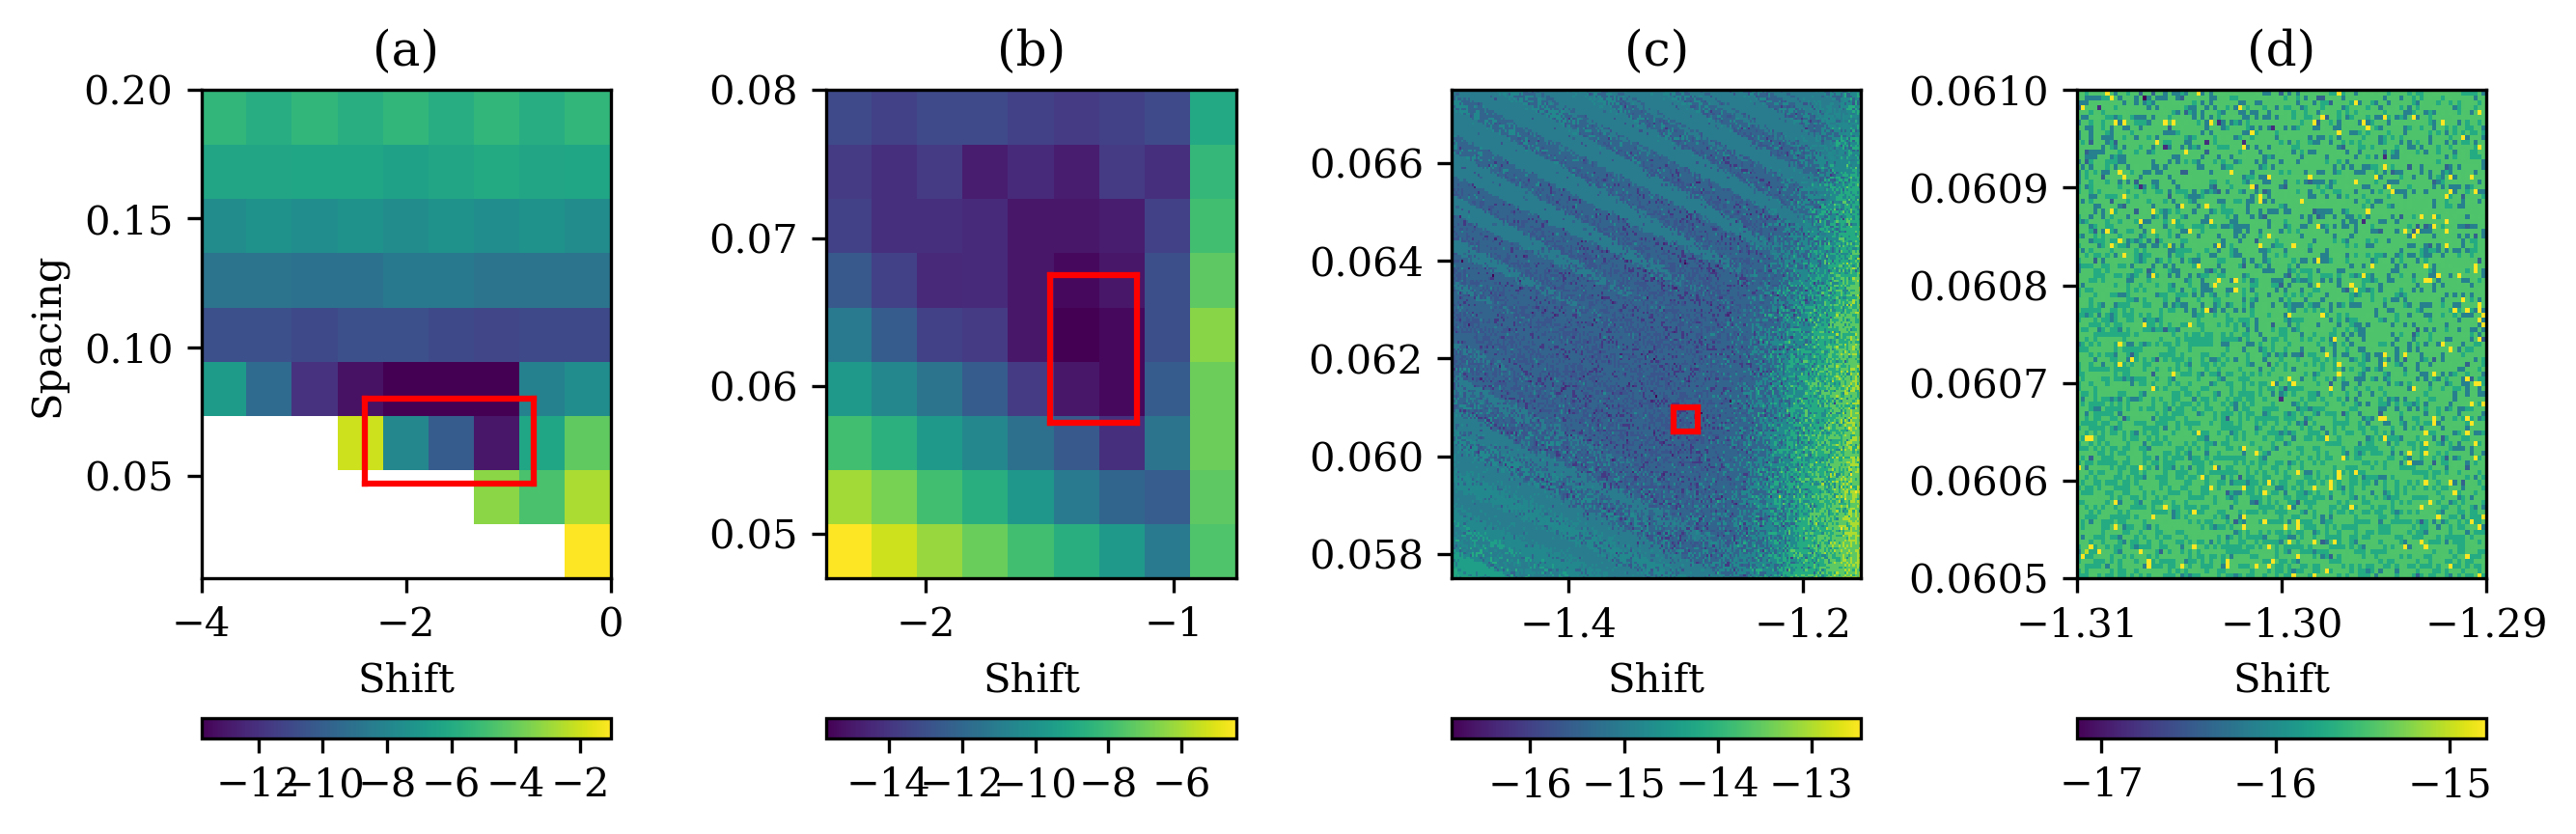

In [35]:
def plot_out(out, out2=False):
    
    # Get spacing and shift values from full output of brute
    spacing = out[2][0, :, 0]
    shift = out[2][1, 0, :]

    # Get minimum field values from full output of brute
    minfield = np.squeeze(out[3])
    
    field = np.log10(minfield)
    cmap = plt.cm.viridis

    field = np.ma.masked_where(np.isinf(minfield), field)
    plt.pcolormesh(shift, spacing, field, cmap=cmap, linewidth=0, rasterized=True)
    
    if out2:
        spacing2 = out2[2][0, :, 0]
        shift2 = out2[2][1, 0, :]
        plt.plot([shift2.min(), shift2.min()], [spacing2.min(), spacing2.max()], 'r')
        plt.plot([shift2.min(), shift2.max()], [spacing2.max(), spacing2.max()], 'r')
        plt.plot([shift2.max(), shift2.max()], [spacing2.max(), spacing2.min()], 'r')
        plt.plot([shift2.max(), shift2.min()], [spacing2.min(), spacing2.min()], 'r')
    
    plt.xlabel('Shift')
    inp = {'orientation': 'horizontal', 'pad': 0.2, 'fraction': 0.1}
    if np.max(minfield) < 1e-12:
        inp['ticks'] = -np.arange(6)-12
    plt.colorbar(**inp)
    
# Create figure
plt.figure(figsize=(9, 3))

# (a) Overview
plt.subplot(141)
plt.title('(a)')
plt.ylabel('Spacing')
plot_out(out1, out2)

# (b) First zoom
plt.subplot(142)
plt.title('(b)')
plot_out(out2, out3)

# (c) Detail
plt.subplot(143)
plt.title('(c)')
plot_out(out3, out4)

# (d) Very detailed
plt.subplot(144)
plt.title('(d)')
plot_out(out4)

plt.tight_layout()

# Save and show plot
plt.savefig('../figures/201.pdf', bbox_inches='tight')
plt.show()

## Figure of filter and best result

/home/dwerthmuller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


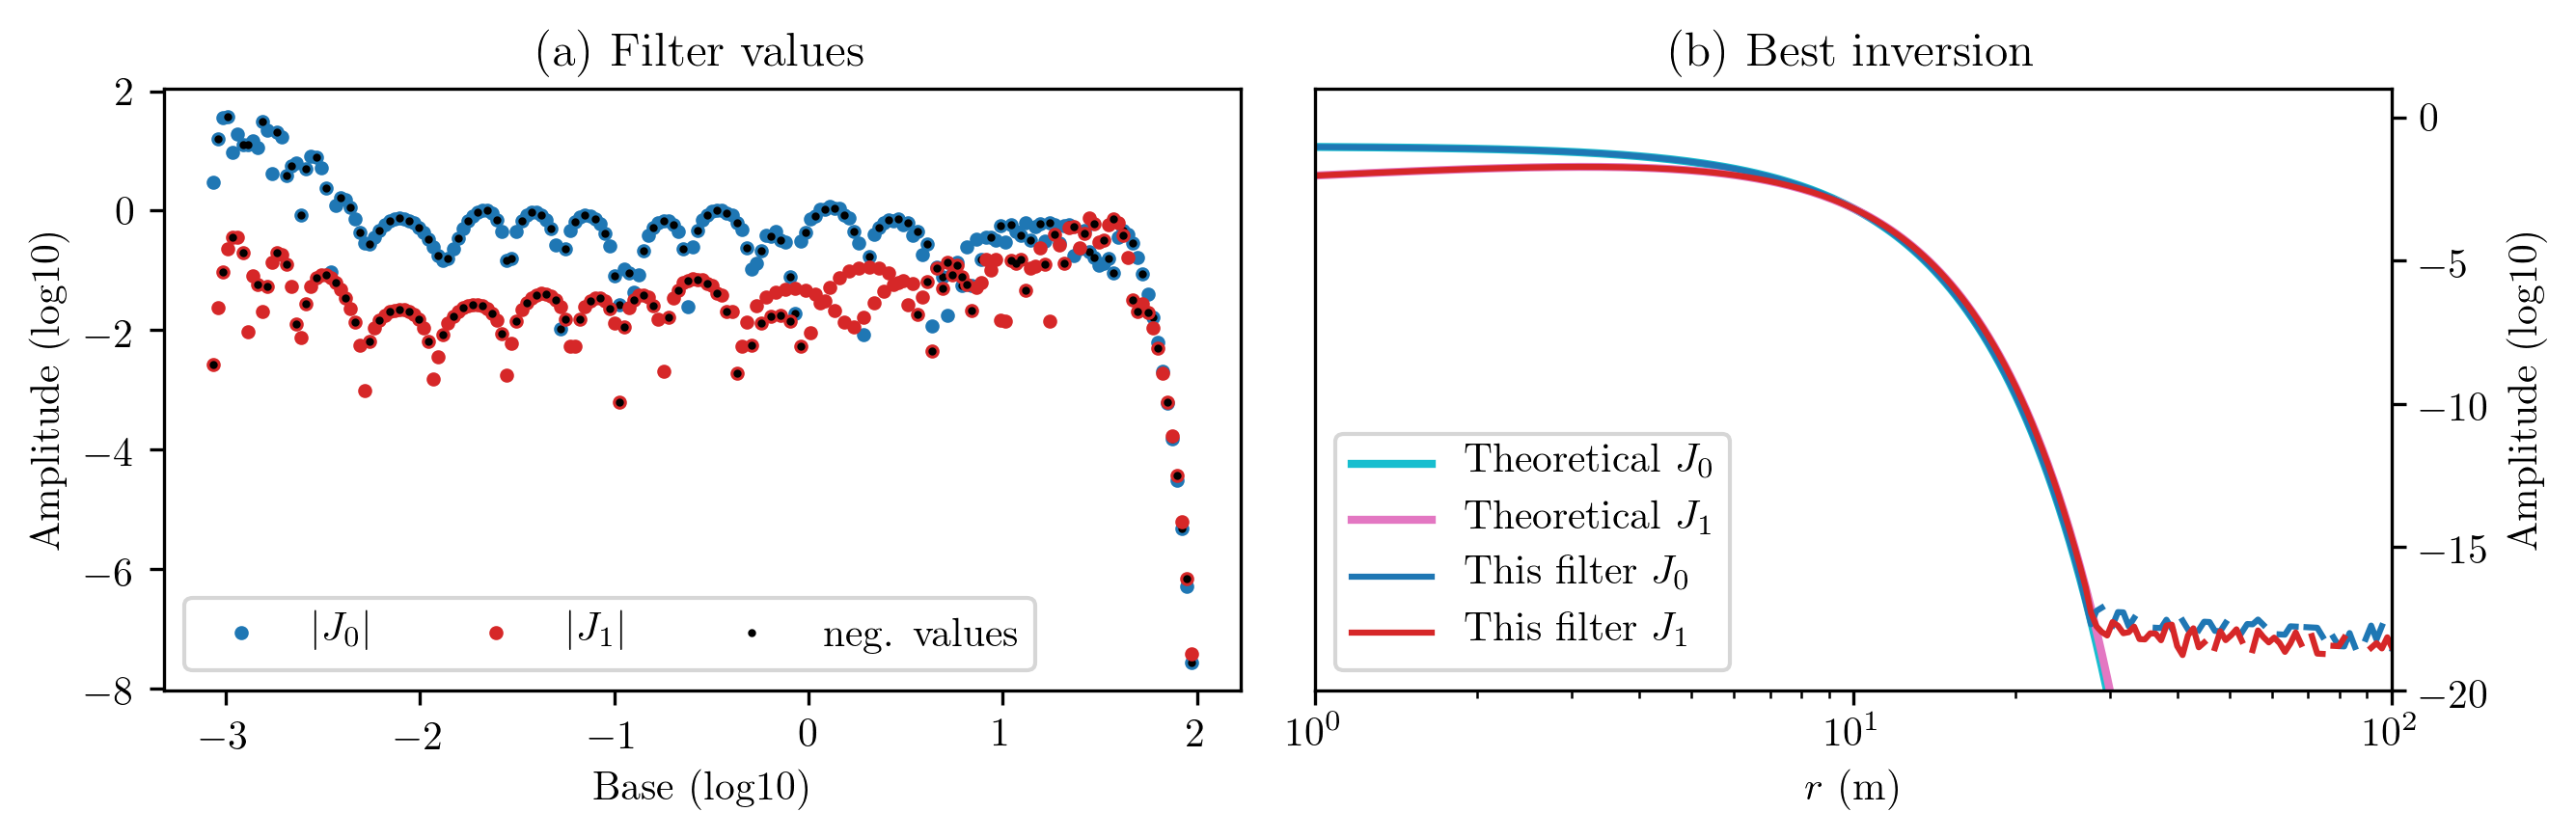

In [5]:
plt.figure(figsize=(9, 3))
plt.subplots_adjust(wspace=0.1)

# (a) Filter values
plt.subplot(121)
plt.title('(a) Filter values')

# J0
plt.plot(np.log10(filt.base), np.log10(np.abs(filt.j0)),
         'C0.', lw=.5, ms=5,  label=r'$|J_0|$')
plt.plot(np.log10(filt.base), np.log10(-filt.j0), 'k.', ms=2)
# J1
plt.plot(np.log10(filt.base), np.log10(np.abs(filt.j1)),
         'C3.', lw=.5, ms=5,  label=r'$|J_1|$')
plt.plot(np.log10(filt.base), np.log10(-filt.j1),
         'k.', ms=2,  label='neg. values')


plt.xlabel('Base (log10)')
plt.ylabel('Amplitude (log10)')
plt.legend(loc=3, ncol=3)


# (b) Plot rhs
ax = plt.subplot(122)
plt.title('(b) Best inversion')

# Transform pair rhs
plt.semilogx(r, np.log10(np.abs(fI0.rhs(r))), 'C9', lw=2, label='Theoretical $J_0$')
plt.semilogx(r, np.log10(np.abs(fI1.rhs(r))), 'C6', lw=2, label='Theoretical $J_1$')

# Calculate rhs-response with this filter
k = filt.base/r[:, None]
rhs0 = np.dot(fI0.lhs(k), filt.j0)/r
rhs1 = np.dot(fI1.lhs(k), filt.j1)/r

# Transform with filter
plt.semilogx(r, np.log10(np.abs(rhs0)), 'C0', lw=1.5, label=r'This filter $J_0$')
plt.semilogx(r, np.log10(np.abs(rhs1)), 'C3', lw=1.5, label=r'This filter $J_1$')

plt.ylim([-20, 1])
plt.xlim([0, 100])
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.ylabel('Amplitude (log10)')
plt.xlabel(r'$r$ (m)')
plt.legend(loc=3, ncol=1)

plt.tight_layout()

# Save and show plot
plt.savefig('../figures/201b.pdf', bbox_inches='tight')
plt.show()

In [4]:
versions('HTML')